<a href="https://colab.research.google.com/github/dtee1/Foundations_of_Machine_Learning_for_Scientists_and_Engineers/blob/main/Assignment_1/IAI5101_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student name: David Talson 

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.axisartist.axislines import Subplot
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score,RocCurveDisplay

import torch
import warnings
import os
import datetime


In [ ]:
def load_dataset(): 
  dataset = pd.read_csv('MedicalCentre.csv')
  return dataset

In [ ]:
def prepare_dataset(dataset):
  """ Prepare the data for downstream processes
    This is done by dropping duplicate rows and rows with missing values 

  Parameters
  ----------
  dataset: DataFrame
    Two-dimensional datastructure with labeled axes, required 

  Raises 
  ------
  Invalid Input error 
    If input dataset is not expected datatype 

  """
  if dataset is None: 
    raise NotImplementedError("Invalid Input")

  dataset = dataset.drop_duplicates()
  proccessed_dataset = dataset.dropna(axis=0)

  return proccessed_dataset


In [ ]:
def visualize_dataset(processed_dataset):
  """ Prepare a scatter plot of numerical features

  Parameters
  ----------
  dataset: DataFrame
    Two-dimensional datastructure with labeled axes, required 

  Raises 
  ------
  Invalid Input error 
    If input dataset is not expected datatype 

  """
  if processed_dataset is None: 
    raise NotImplementedError("Invalid Input")

  count = 1
  for column in processed_dataset:
    if (processed_dataset[column].dtype.kind in 'iufc'):
      plt.figure(count,figsize=(16,16))
      plt.title('Scatter plot for ' + column)
      plt.scatter(processed_dataset.index, processed_dataset[column])
      plt.xlabel('Index') 
      plt.ylabel(column) 
      count = count+1
  

In [ ]:
def convert_date_time(date):
  """ Create a datetime object from given string

  Parameters
  ----------
  dataset: 
    One-dimensional datastructure with labeled axes, required 

  Raises 
  ------
  Invalid Input error 
    If string is not in format %Y-%m-%dT%H:%M:%SZ

  """
  if date is None: 
    raise NotImplementedError("Invalid Input")
  new_date_one = datetime.datetime.strptime(date,"%Y-%m-%dT%H:%M:%SZ")
  return new_date_one


In [ ]:
def normalize(input):
  """ Normalize input between 0 and 1

  Parameters
  ----------
  input: 
    One-dimensional datastructure with labeled axes, required 

  Raises 
  ------
  Invalid Input error 
    If input is empty
  """

  scaler = MinMaxScaler()
  transformed_input = scaler.fit_transform(input)
  return transformed_input

In [ ]:
def getAccuracy(model, x, y):
  """ Get accuracy of model
  Parameters
  ----------
  model: 
    model to be evaluated

  Raises 
  ------
  Invalid Input error 
    If parameter is missing 
  """
  return model.score(x,y)*100

# Part A: 



In [ ]:
dataset = load_dataset();
dataset.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110524.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088488,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110271,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Part A, Question 1
The dataset used is significantly large and the amount of missing or duplicates is very little, therefore dropping rows with missing/duplicate data was a better alternative to taking the mean or mode. Also, due to the nature of the dataset where features are either unique or interger values. This means using the mean or mode can lead to the model learning from inaccurate data.

In [ ]:
processed_dataset = prepare_dataset(dataset)

# Part A, Question 2: Frequency of distinct values in dataset
The frequency of distinct values is a good indicator of the distribution of the dataset.  

In [ ]:
for column in processed_dataset:
  print('Column: ',column)
  print(processed_dataset[column].value_counts(),'\n')

Column:  PatientID
8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
               ... 
6.978773e+10      1
9.847957e+10      1
4.226995e+10      1
5.734915e+10      1
9.481592e+10      1
Name: PatientID, Length: 6100, dtype: int64 

Column:  AppointmentID
5642903    1
5675362    1
5647618    1
5687640    1
5740664    1
          ..
5441938    1
5565998    1
5718442    1
5426425    1
5629448    1
Name: AppointmentID, Length: 110524, dtype: int64 

Column:  Gender
F    71838
M    38686
Name: Gender, dtype: int64 

Column:  ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-16T09:12:51Z     1
2016-05-09T10:48:50Z     1
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103546, dtype: int64 

Column:  AppointmentDay
2016-06-06T00:00:00Z    4692
2016-05

# Part A, Question 3: Visualize Data for outliers 
Plotting numerical features can help visualize outliers. For this data set a scatter plot was used as a scatter plot would easily show any outlier when plotted. For example, for the Age feature, we see an outlier at -1 as we know age cannot be negative. Also, the handicapped feature shows some outliers as the one can either only be handicapped or not (0 or 1) 

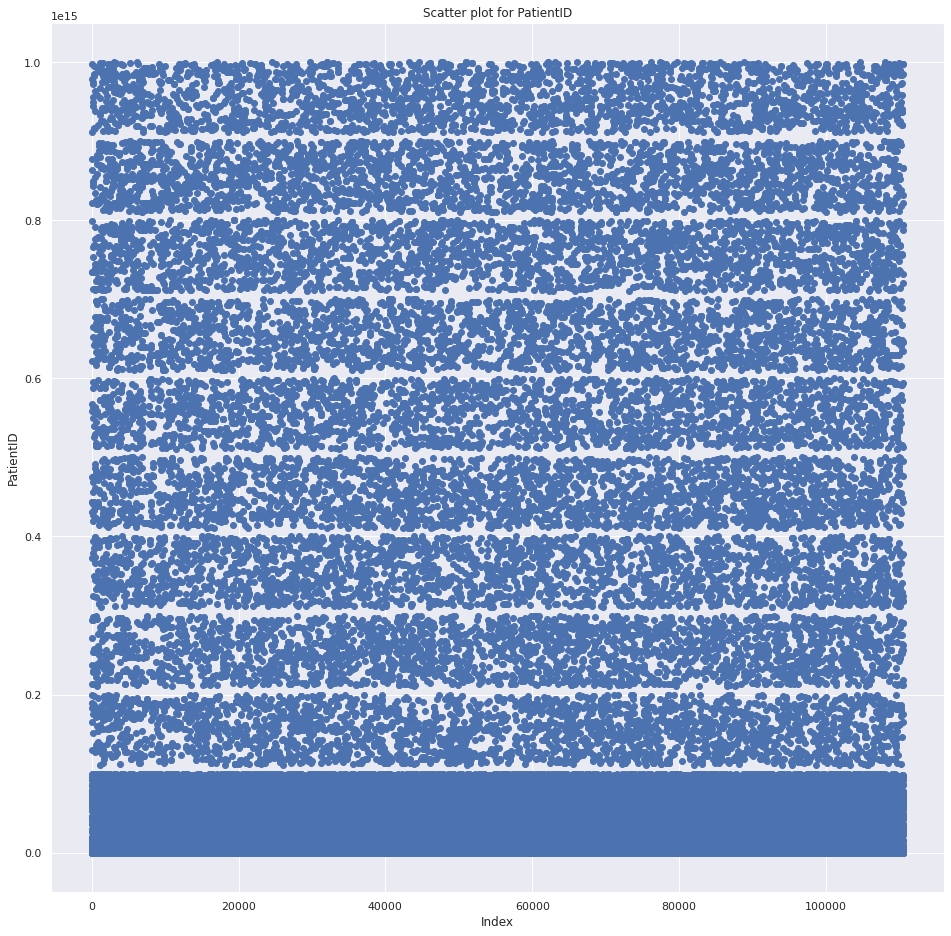

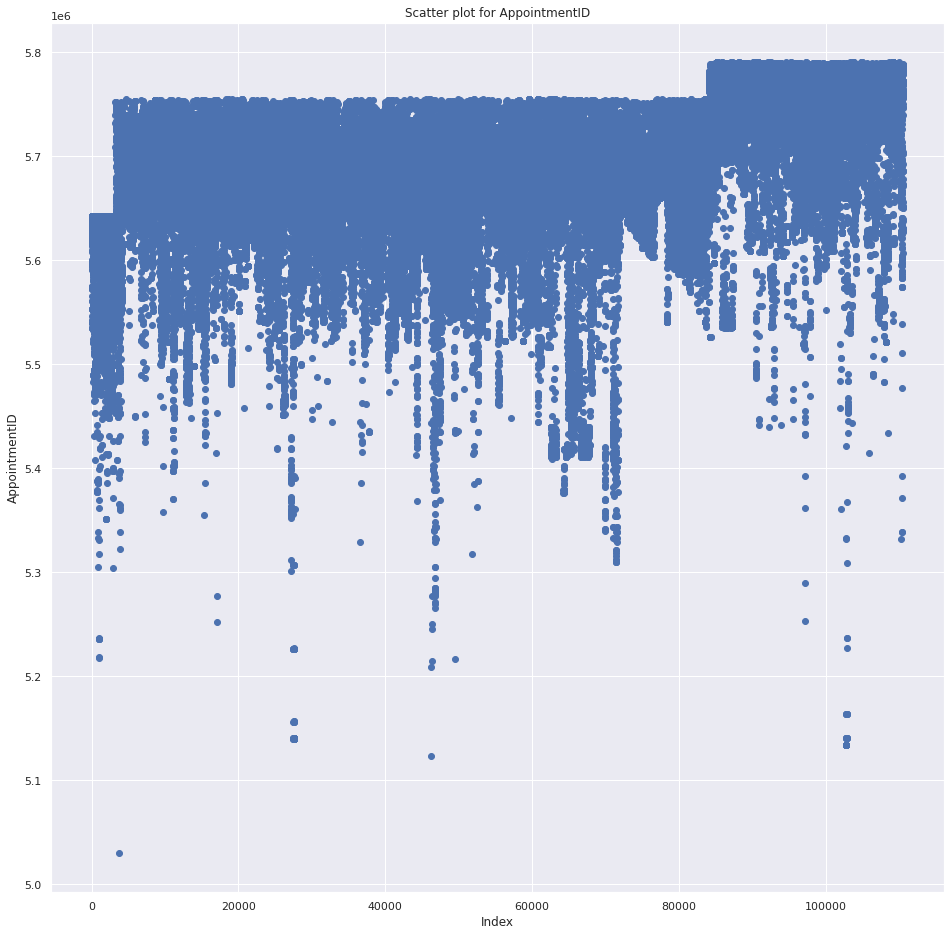

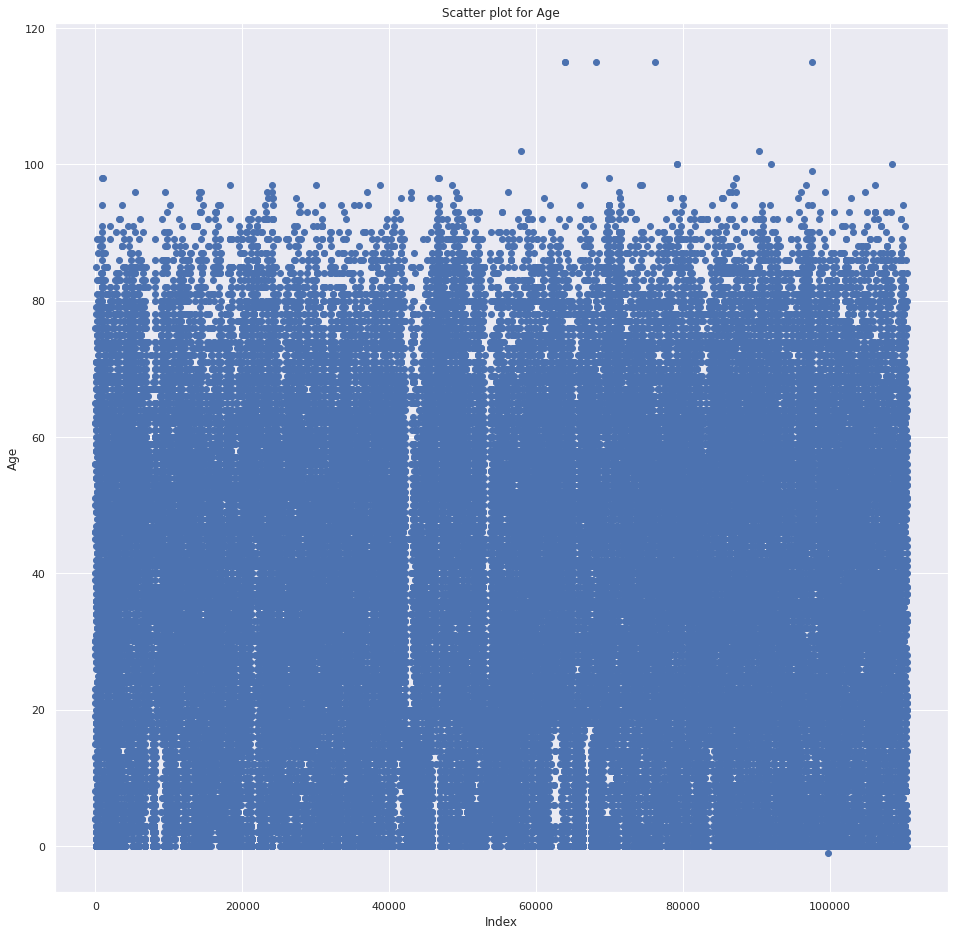

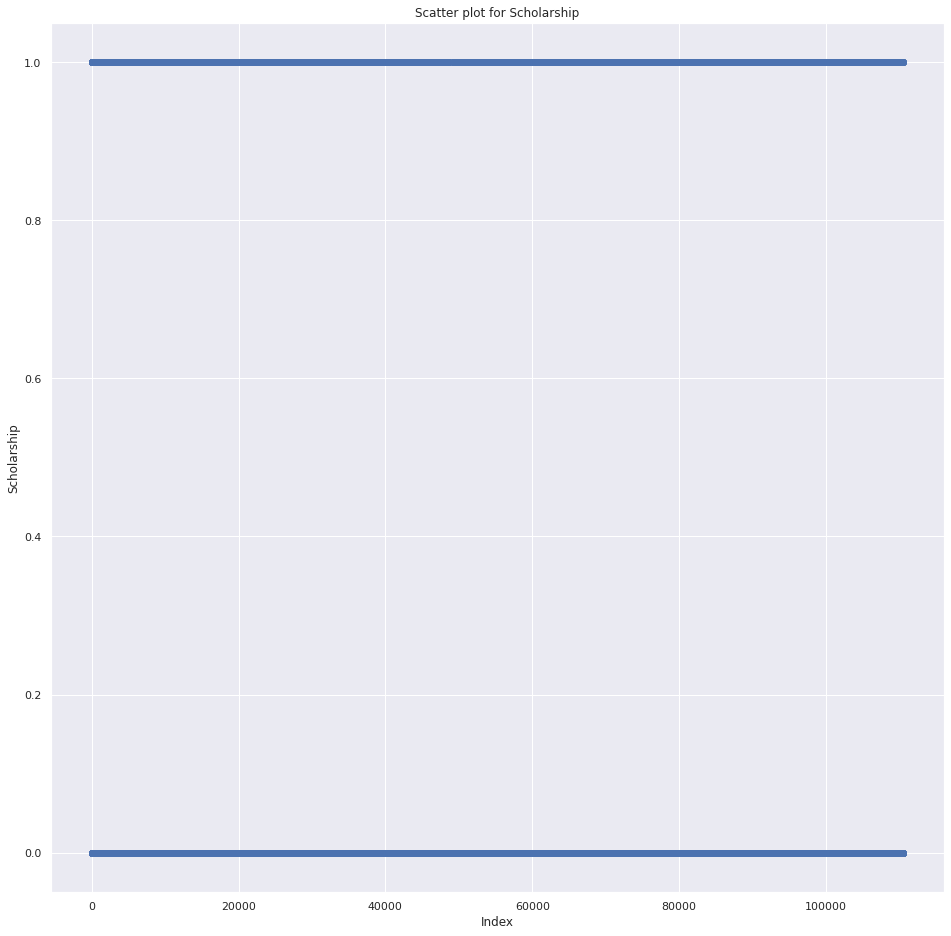

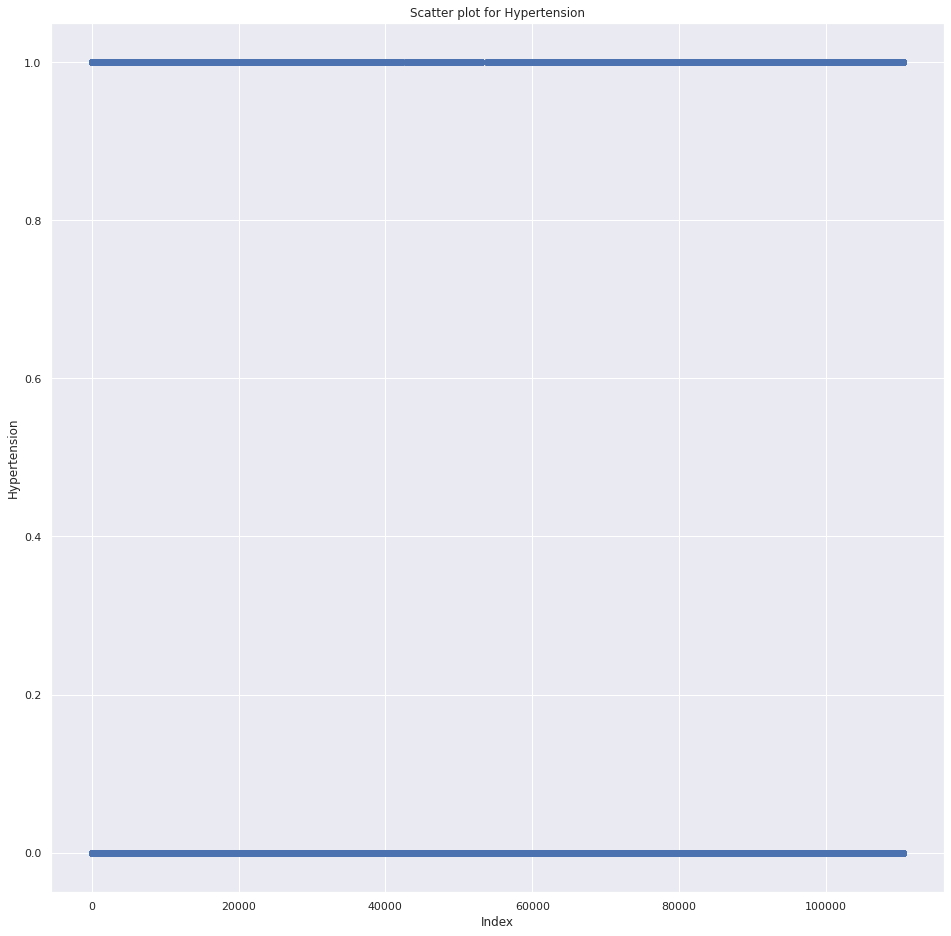

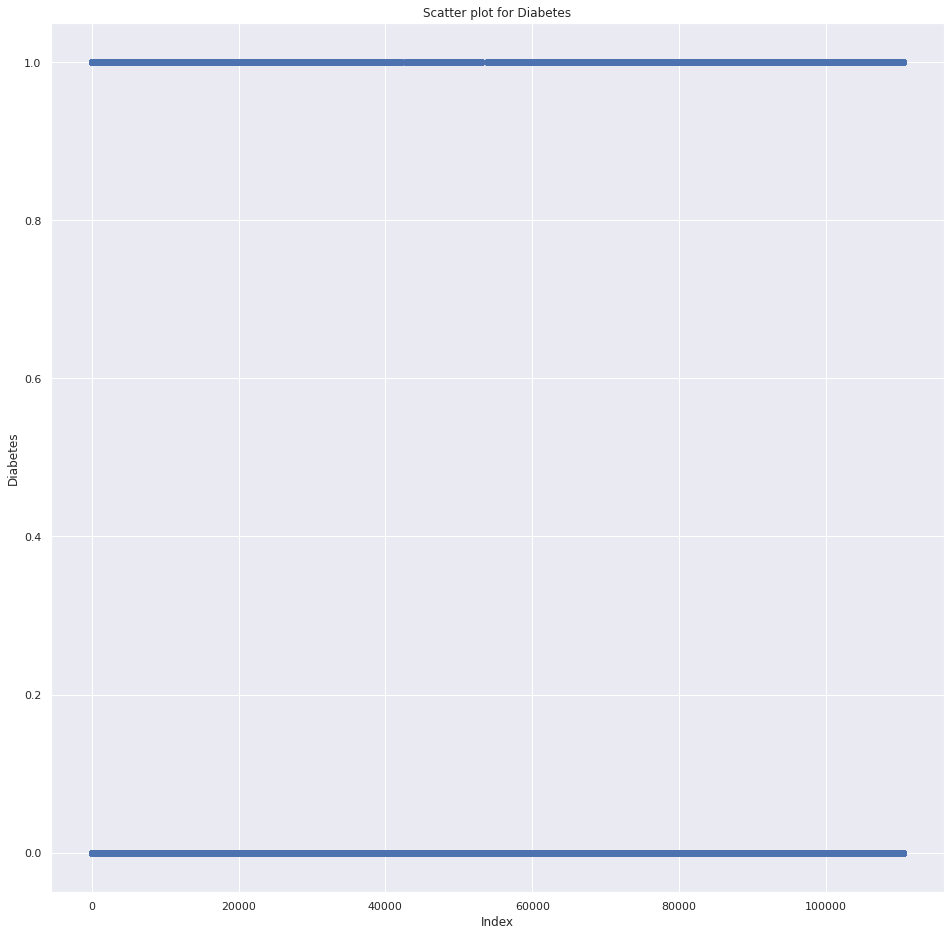

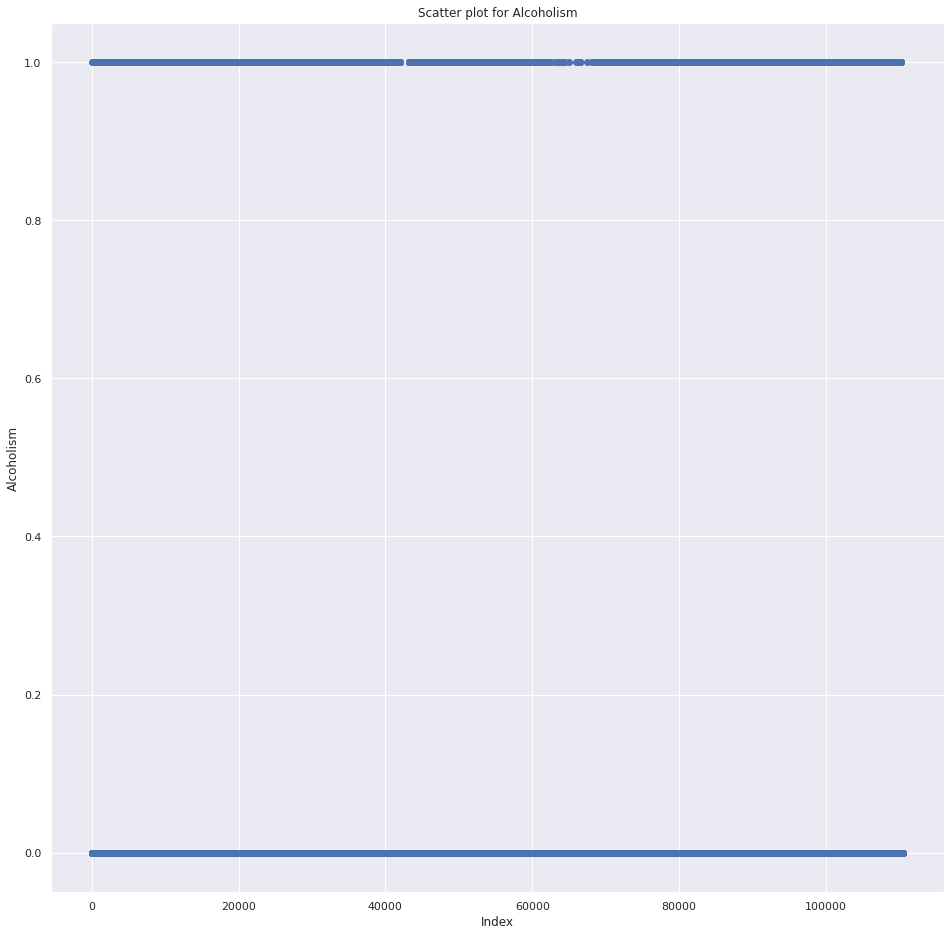

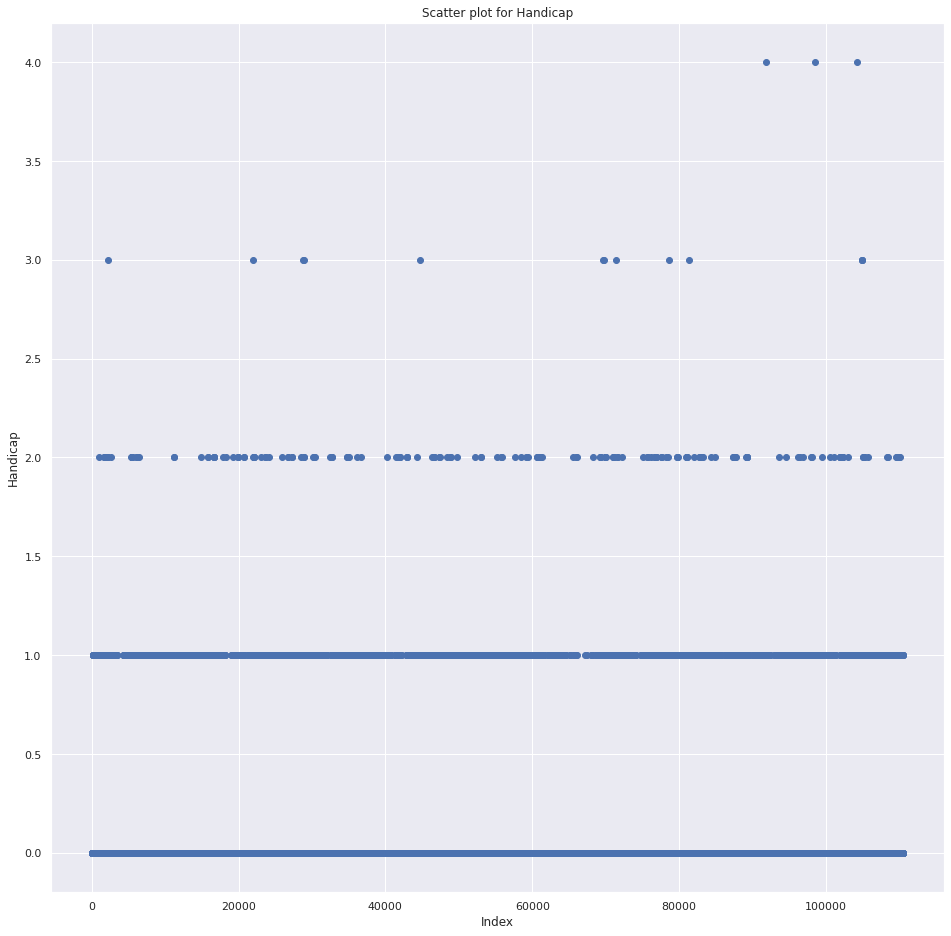

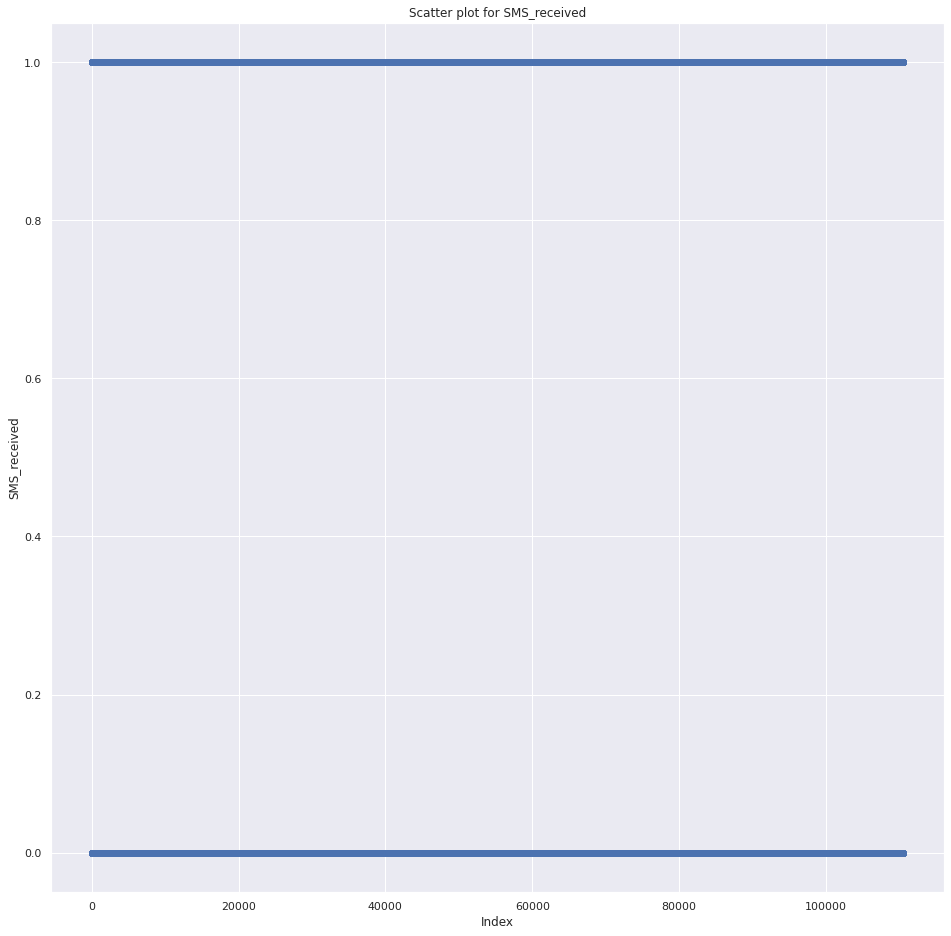

In [ ]:
visualize_dataset(processed_dataset)

# Part A, Question 4: Remove Negative Age Values
A negative age value does not make sense, hence it is removed. 

In [ ]:
print('Number of Negative age values:' , (processed_dataset['Age'] < 0).sum().sum())
processed_dataset.drop(processed_dataset[processed_dataset['Age'] < 0].index, inplace = True)

Number of Negative age values: 1


 # Part A, Question 5: Remove Negative Awaiting Time
The awaiting time is calculated as the difference between the appointment time and the scheduled time. Also, a negative awaiting time does not make sense, therefore it is dropped. 

In [ ]:
processed_dataset['AwaitingTime'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]) - pd.DatetimeIndex(processed_dataset["ScheduledDay"])
processed_dataset.drop(processed_dataset[processed_dataset['AwaitingTime'].dt.days < 0].index, inplace = True)

# Part A, Question 6
Label encoding is a technique used to transform labels to numeric forms which is machine-readable. In this section, the gender, no-show, and neighbourhood columns are label encoded. 

In [ ]:
labelEncoder = LabelEncoder()
processed_dataset['Gender'] = labelEncoder.fit_transform(processed_dataset['Gender'])
processed_dataset['No-show'] = labelEncoder.fit_transform(processed_dataset['No-show'])
processed_dataset['Neighbourhood'] = labelEncoder.fit_transform(processed_dataset['Neighbourhood'])

# Separate the date features into date components
The scheduled date and time are datetime objects which is not machine-readable. This is why the scheduled, appointment, and awaiting dates are separated. 

In [ ]:
processed_dataset['ScheduledYear'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).year
processed_dataset['ScheduledMonth'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).month

processed_dataset['ScheduledHour'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).hour
processed_dataset['ScheduledMin'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).minute
processed_dataset['ScheduledSec'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).second
processed_dataset['ScheduledDay'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).day

processed_dataset['AppointmentYear'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).year
processed_dataset['AppointmentMonth'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).month

processed_dataset['AppointmentHour'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).hour
processed_dataset['AppointmentMin'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).minute
processed_dataset['AppointmentSec'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).second
processed_dataset['AppointmentDay'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).day

processed_dataset['AwaitingMinutes'] = processed_dataset['AwaitingTime'] / pd.Timedelta(minutes=1)
processed_dataset['AwaitingDays'] = processed_dataset['AwaitingTime'].dt.days
processed_dataset = processed_dataset.drop('AwaitingTime', axis=1)

 # Part A, Question 8
 Normalization helps to narrow the dataset around 0 which improves the performance of the machine learning algorithm. For this task, the age feature is normalized between 0-1 using a min_max scaler

In [ ]:
processed_dataset['Age'] = normalize(processed_dataset["Age"].values.reshape(-1,1))

# Part A, Queation 9: Correlation Matrix
The correlation matrix determines shows how related features are, this helps to determine features to be dropped based on a correlation threshold. Some further data cleaning is done before creating a correlation matrix. Features which have the same values are removed as they would appear blank on a correlation matrix. A correlation threshold of 0.2 was selected to enable more feature reduction. 

<AxesSubplot:>

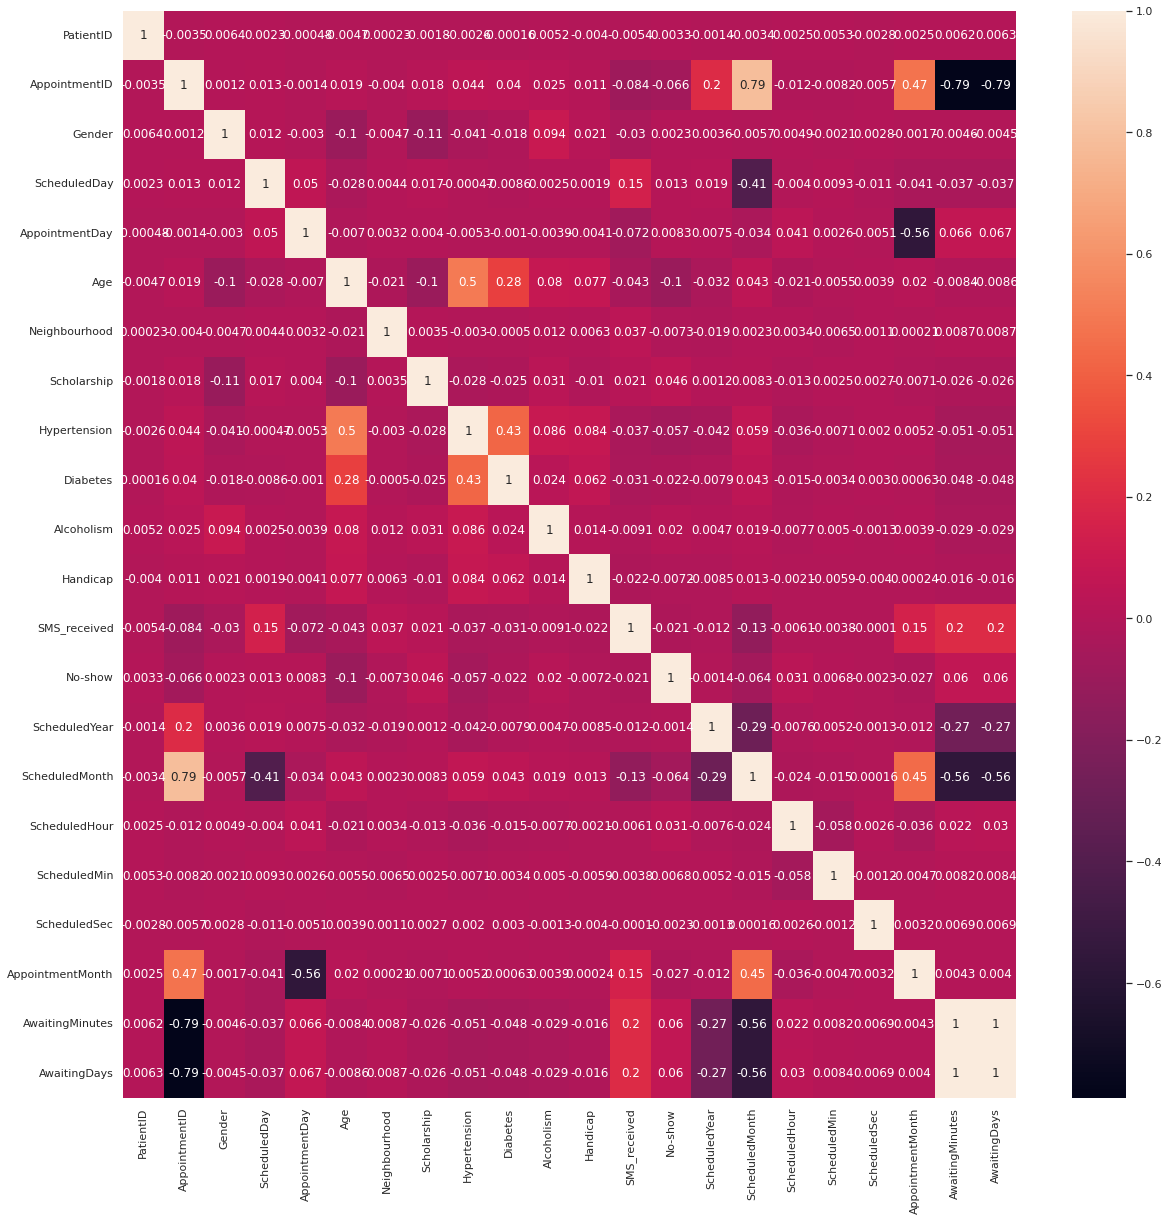

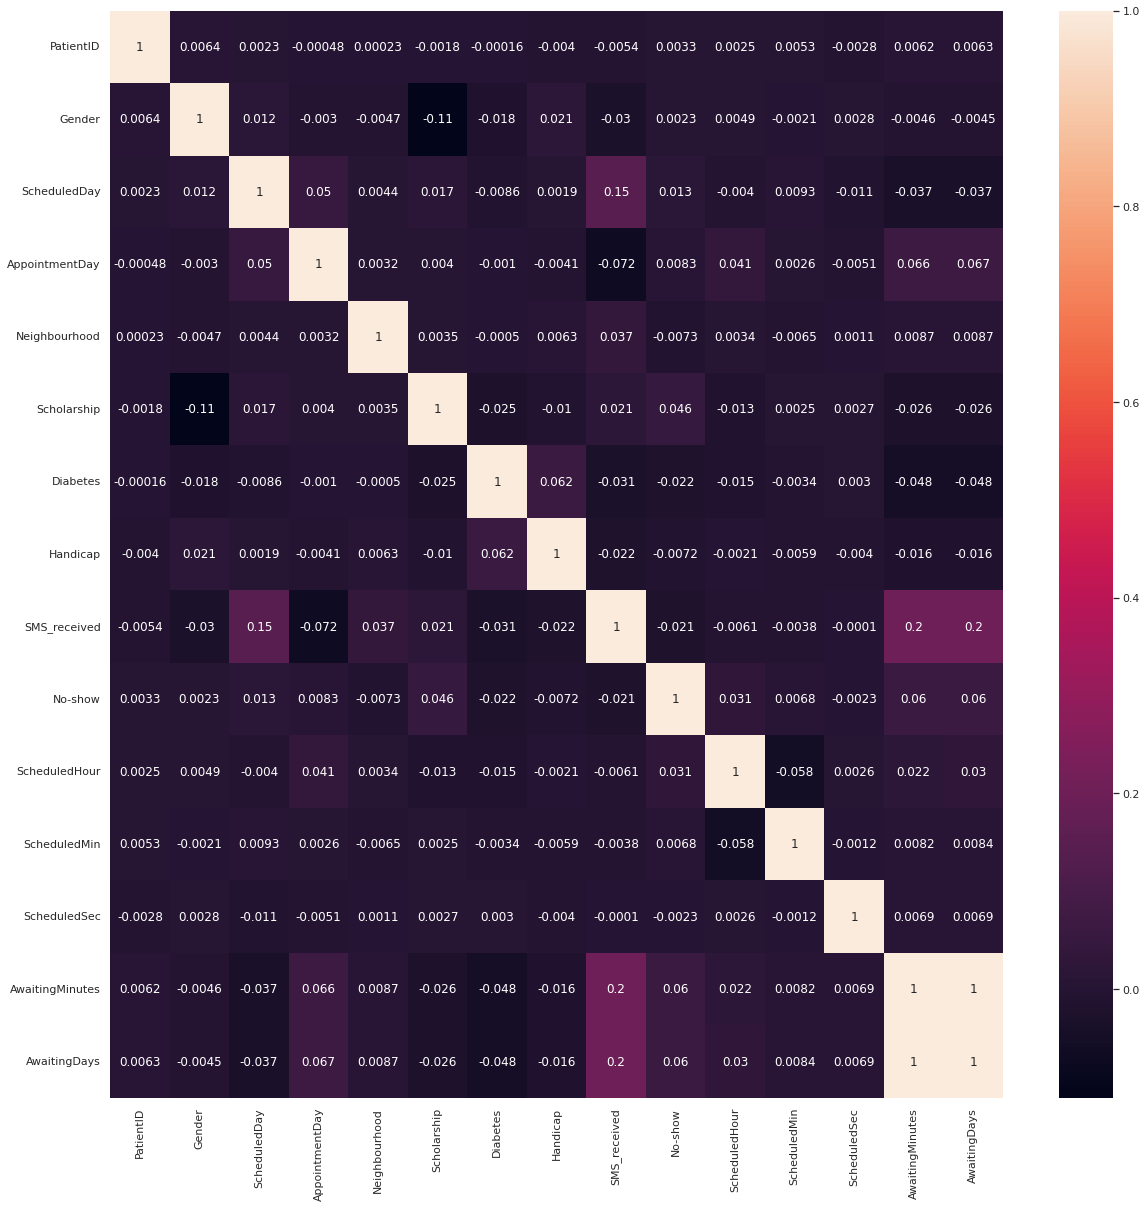

In [ ]:
# Remove columns with same values
nunique = processed_dataset.nunique()
columns_same_val = nunique[nunique == 1].index
processed_dataset = processed_dataset.drop(columns_same_val, axis=1)

# Part A, Question 9 
plt.figure(1)
sns.set(rc={'figure.figsize': (20, 20)})
sns.heatmap(processed_dataset.corr(),annot=True)

cols_to_drop = ['ScheduledMonth', 'AppointmentID','ScheduledYear','AppointmentMonth','Age','Hypertension','Alcoholism']
processed_dataset = processed_dataset.drop(cols_to_drop, axis=1)

plt.figure(2)
sns.set(rc={'figure.figsize': (20, 20)})
sns.heatmap(processed_dataset.corr(),annot=True)


# Part B
In this section, a naive bayes classifier is used to create a model and perform prediction. A naive bayes classifier works based on the bayes theorem that the probability of the occurence of A can B calculated after B has occured. The gaussian naive bayes was used and the results shown below. The dataset was split into test and train using and then scaled using the standard scaler package. Finally, the patientid feature was dropped because it is unique and not a useful feature for prediction

[[13865  1479]
 [ 5466   778]]

 Confusion Matrix:



<AxesSubplot:>

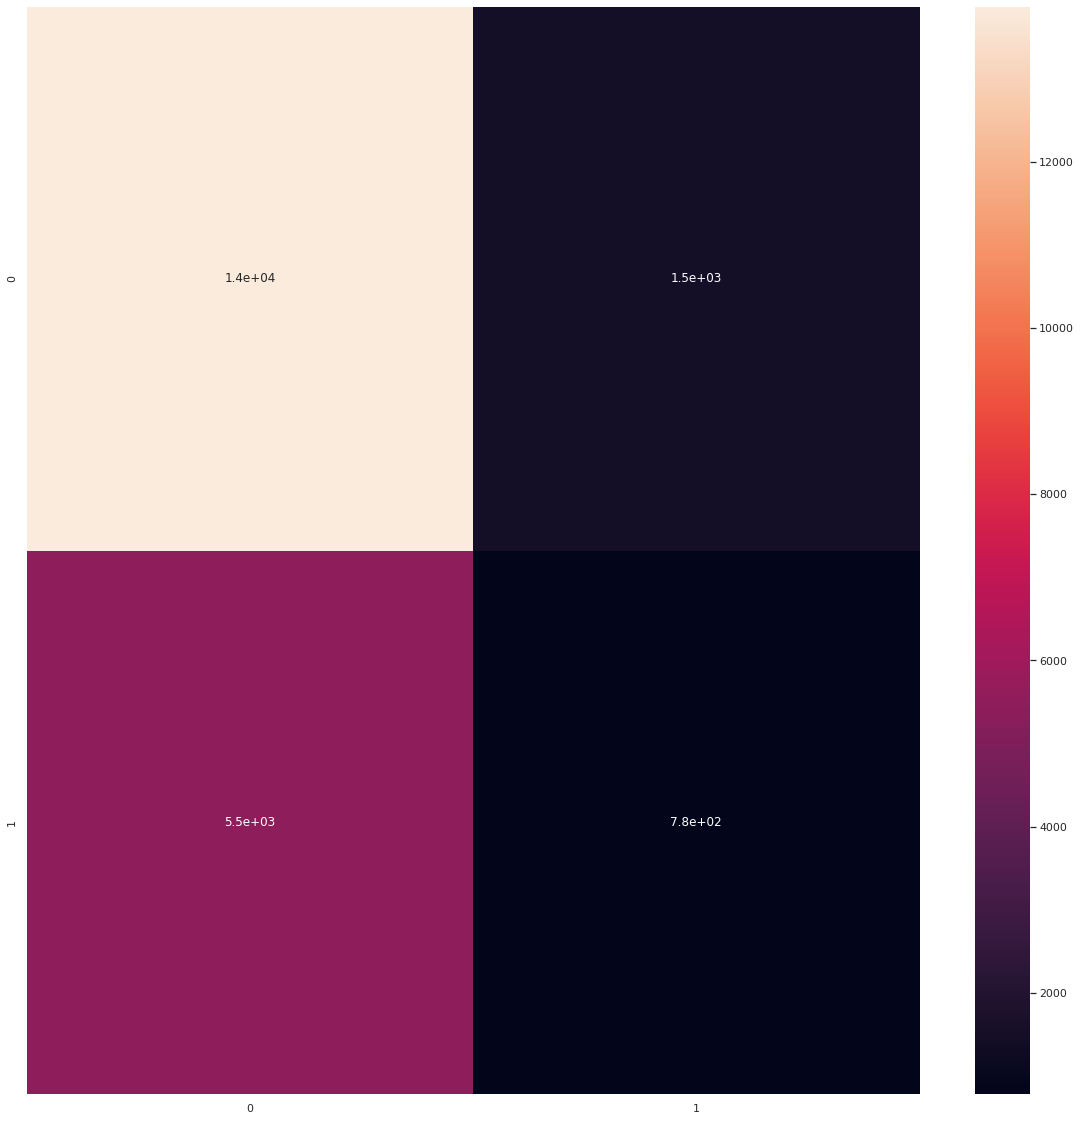

In [ ]:
y = processed_dataset['No-show']
X = processed_dataset.drop(['No-show','PatientID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
bayes_model = GaussianNB()
bayes_model.fit(X_train_std, y_train)
y_pred_nb = bayes_model.predict(X_test_std)
print(confusion_matrix(y_test, y_pred_nb))
print("\n Confusion Matrix:\n")
plt.figure(3)
sns.heatmap(confusion_matrix(y_test,y_pred_nb),annot=True)

# Part C: Question 1
As can be seen from the results the naive bayes performed fairly ok with an accuracy of approximately 68%. The f1-score was 0.18  which indicates a poor harmonic mean between the precision and recall. There was no overfitting in the performance of the model.

In [ ]:

print('Accuracy of base naive bayes model: {:.2f}%'.format(getAccuracy(bayes_model, X_test_std, y_test)))
print("Classification Report is:\n",classification_report(y_test,y_pred_nb))
print("\n F1:\n",f1_score(y_test,y_pred_nb))
print("\n Precision score is:\n",precision_score(y_test,y_pred_nb))
print("\n Recall score is:\n",recall_score(y_test,y_pred_nb))

Accuracy of base naive bayes model: 67.83%
Classification Report is:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80     15344
           1       0.34      0.12      0.18      6244

    accuracy                           0.68     21588
   macro avg       0.53      0.51      0.49     21588
weighted avg       0.61      0.68      0.62     21588


 F1:
 0.18303728973061992

 Precision score is:
 0.34470536109880373

 Recall score is:
 0.12459961563100577


# Part C: Question 2
The accuracy of the naive bayes model above indicates that there is room for imporement. This improvement can be acheived by tuning the paramaters. Grid search CV is a method of parameter tuning where an exhaustive search is done over specified parameter for an estimator. For the naive bayes model, the var_smoothing parameter is tuning to improve the accuracy of the model. As can be seen from the result below it was able to improve the model accuracy by around 5%.

In [ ]:
param_grid = {
  'var_smoothing': np.logspace(0,-2, num=10)
}
bayes_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, verbose=1, cv=10, n_jobs=-1)   
bayes_model_new= bayes_grid.fit(X_train_std, y_train) 
y_pred_grid = bayes_model.fit(X_train_std, y_train).predict(X_test_std)

print(confusion_matrix(y_test, y_pred_grid))
print('Accuracy of base naive bayes model using grid search cv : {:.2f}%'.format(getAccuracy(bayes_model_new, X_train_std, y_train)))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[[13865  1479]
 [ 5466   778]]
Accuracy of base naive bayes model using grid search cv : 71.62%


# Part C: Question 3
In this section, other models are tested. The SVC and decision tree models are created and tested. However, it is important to note that due to the nature of the dataset and limited computational resources, a linear svc was used instead

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report is:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83     15344
           1       0.18      0.00      0.00      6244

    accuracy                           0.71     21588
   macro avg       0.45      0.50      0.42     21588
weighted avg       0.56      0.71      0.59     21588

Accuracy using SVC : 0.71%
Classification Report using SVC is:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83     15344
           1       0.18      0.00      0.00      6244

    accuracy                           0.71     21588
   macro avg       0.45      0.50      0.42     21588
weighted avg       0.56      0.71      0.59     21588


 F1:
 0.0006394884092725819

 Precision score is:
 0.18181818181818182

 Recall score is:
 0.00032030749519538755

 Confusion Matrix:

Accuracy using decision tree classfier : 0.60%
Classification Report using Decision Tree is:
               precision  

<AxesSubplot:>

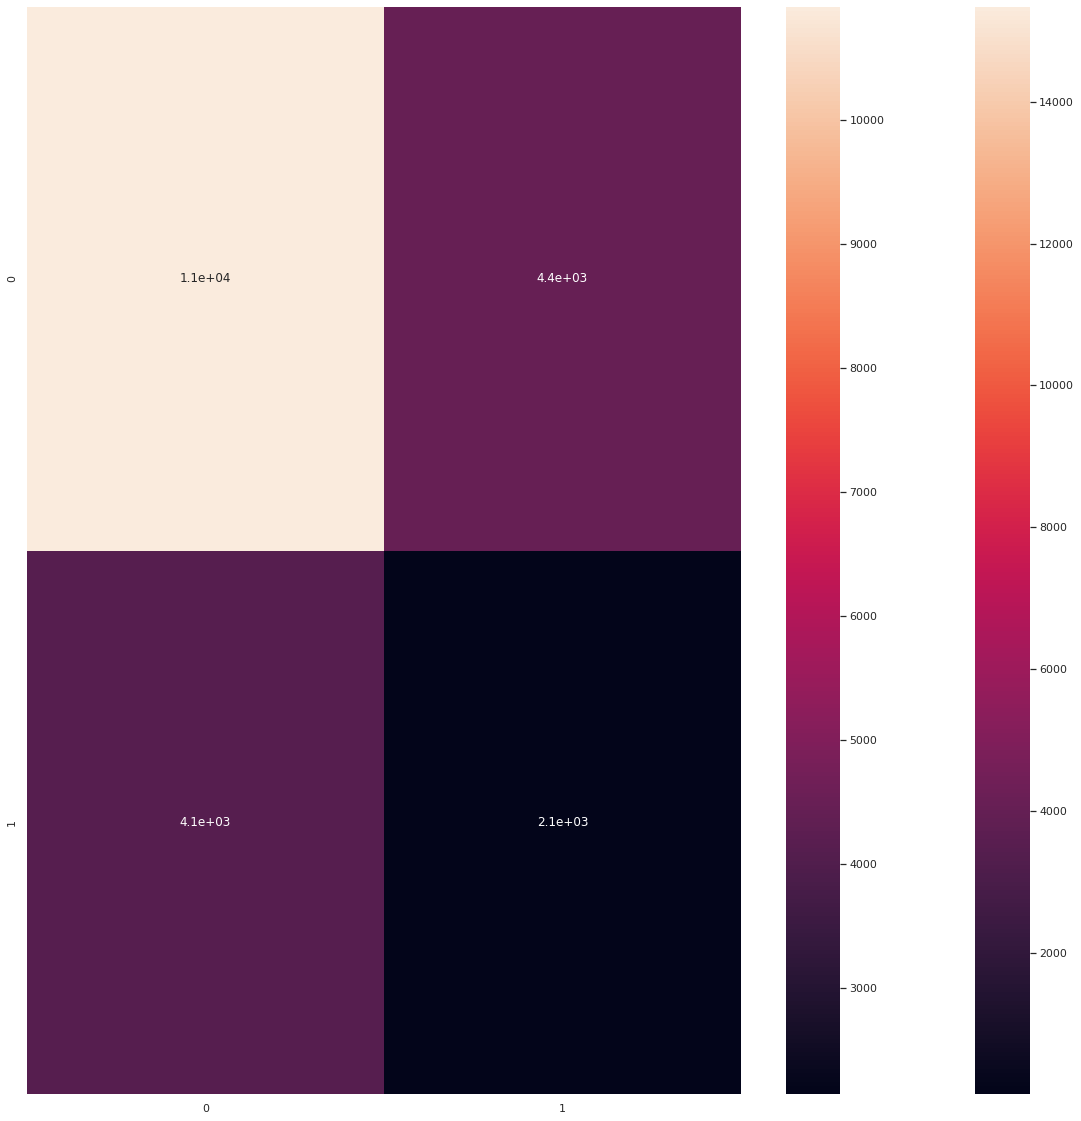

In [ ]:
model_svc = LinearSVC(max_iter=3000)
y_pred_svm = model_svc.fit(X_train_std, y_train).predict(X_test_std)

print("Classification Report is:\n",classification_report(y_test,y_pred_svm))
print('Accuracy using SVC : {:.2f}%'.format(accuracy_score(y_test, y_pred_svm, normalize=True)))
print("Classification Report using SVC is:\n",classification_report(y_test,y_pred_svm))
print("\n F1:\n",f1_score(y_test,y_pred_svm))
print("\n Precision score is:\n",precision_score(y_test,y_pred_svm))
print("\n Recall score is:\n",recall_score(y_test,y_pred_svm))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred_svm))

model_dt = DecisionTreeClassifier()
y_pred_dt = model_dt.fit(X_train_std, y_train).predict(X_test_std)
print('Accuracy using decision tree classfier : {:.2f}%'.format(accuracy_score(y_test, y_pred_dt, normalize=True)))
print("Classification Report using Decision Tree is:\n",classification_report(y_test,y_pred_dt))
print("\n F1:\n",f1_score(y_test,y_pred_dt))
print("\n Precision score is:\n",precision_score(y_test,y_pred_dt))
print("\n Recall score is:\n",recall_score(y_test,y_pred_dt))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True)

# Comparison 
As can be seen from the accuracies, f1 scores and precision of the models. SVC had the best performance while decision trees had the worst accuracy. Decision tree had the best f-1 score while svc had the worst.  Decision tree also had the best recall and precision scores while svc had the worst.

# Part C: Question 4
In this section, a ROC analysis will show a visual comparision of the performance of the models. From the plot, the performance of the models is not very different. 

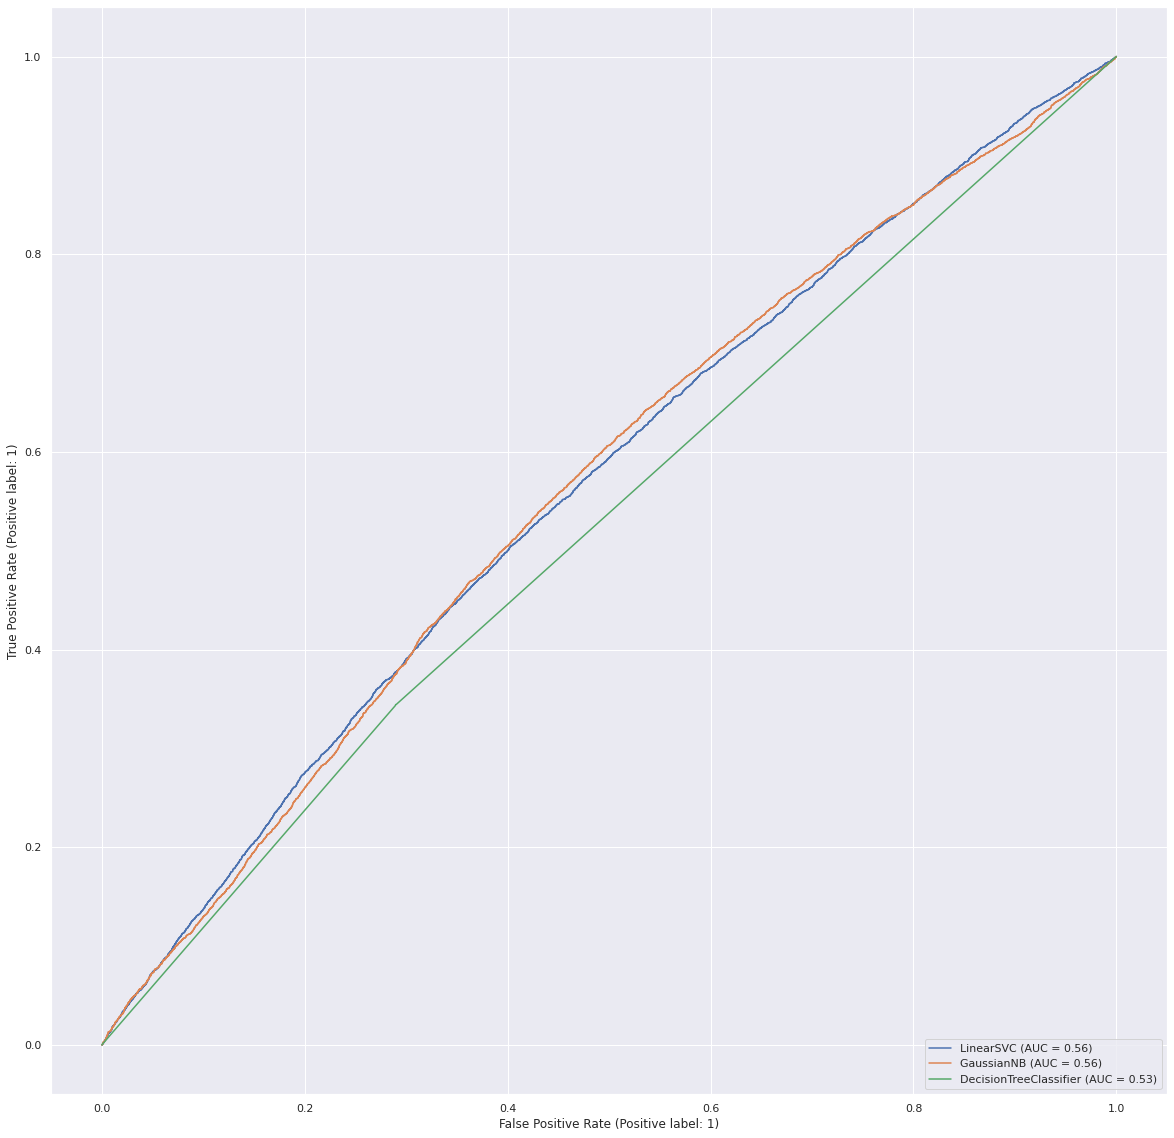

In [ ]:
ax = plt.gca()
svc_disp = RocCurveDisplay.from_estimator(model_svc, X_test_std, y_test, ax=ax, alpha=1)
naive_disp = RocCurveDisplay.from_estimator(bayes_model, X_test_std, y_test, ax=ax, alpha=1)
naive_disp = RocCurveDisplay.from_estimator(model_dt, X_test_std, y_test, ax=ax, alpha=1)
plt.show()